<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/Pr%C3%A1ctica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paulina Morgan Jiménez
Estadistica Inferencial II

Práctica 01

In [ ]:
#a) revisa si el dataset tiene valores nulos mediante df.info(), en dado caso, aplica df.dropna(inplace = True).

import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Morganblabla/Estadistica/refs/heads/main/data.csv")
df.dropna(inplace = True)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlación')

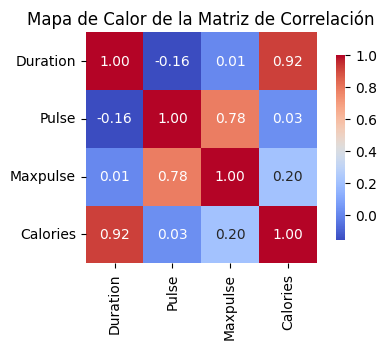

In [ ]:
#b) Obtén un mapa de calor con la matriz de correlación. Determina las variables independientes y la variable dependiente y redacta una hipótesis.

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')

Coeficiente de determinación:  0.8908



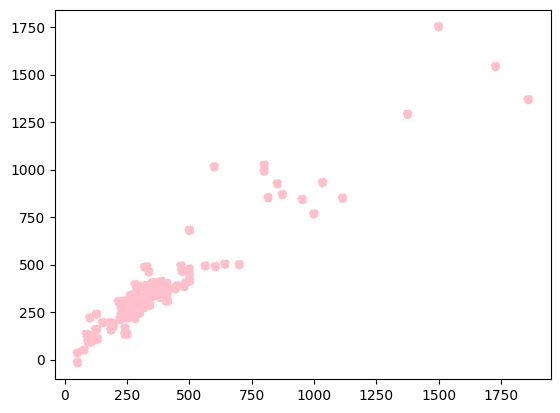

In [ ]:
#c) Obtén el modelo que permite relacionar las variables independientes y la variable dependiente.

X = df[["Duration","Maxpulse"]]
Y = df['Calories']

import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

b0, b1, b2 = modelo.params

fun = lambda x1, x2: b0 + b1 * x1 + b2 * x2

Yc = modelo.predict(x_constante)

plt.scatter(Y, Yc, color = 'pink', linestyle = '--')

from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(Y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

In [ ]:
#d)Obtén el coeficiente de correlación e interpreta el resultado.
from scipy.stats import pearsonr

r, _ = pearsonr(Y, Yc)
print(f'Coeficiente de correlación: {r:.4f}')

Coeficiente de correlación: 0.9438


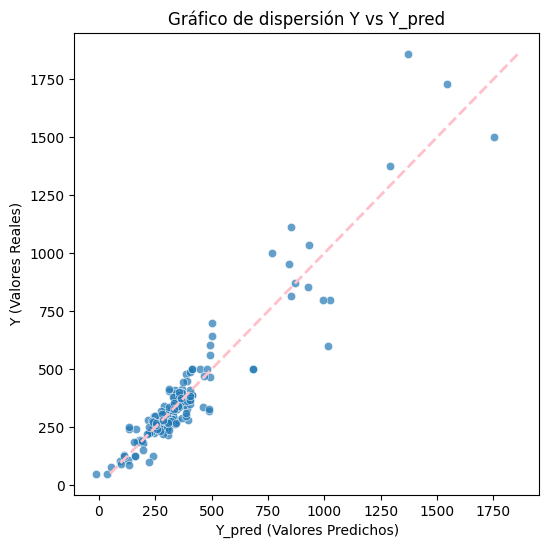

Estadístico de Shapiro-Wilk: 0.8632
Valor p: 0.0000
Se rechaza H0: Los residuales no siguen una distribución normal.
Valor p del test de Breusch-Pagan: 0.0000
Hay heterocedasticidad


In [ ]:
#e)Verifica los supuestos mediante un gráfico "y" vs "y_pred"
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=Yc, y=Y, alpha=0.7)  # Yc = Y predicho, Y = Y real

plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='pink', linestyle='--', linewidth=2)

plt.xlabel('Y_pred (Valores Predichos)')
plt.ylabel('Y (Valores Reales)')
plt.title('Gráfico de dispersión Y vs Y_pred')

plt.show()
# Test de Shapiro-Wilk
from scipy.stats import shapiro
import numpy as np

residuales = Y - Yc

stat, p_value = shapiro(residuales)

print(f'Estadístico de Shapiro-Wilk: {stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Interpretación
alpha = 0.05  # Nivel de significancia del 5%
if p_value > alpha:
    print("No se rechaza H0: Los residuales parecen seguir una distribución normal.")
else:
    print("Se rechaza H0: Los residuales no siguen una distribución normal.")

# Test de Breusch-Pagan. Interpreta los resultados.
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

residuales = Y - Yc

X_con_intercepto = sm.add_constant(X)

bp_test = het_breuschpagan(residuales, X_con_intercepto)

p_value = bp_test[1]
print(f'Valor p del test de Breusch-Pagan: {p_value:.4f}')

# Interpretación
alpha = 0.05  # Nivel de significancia del 5%
if p_value > alpha:
    print("No hay evidencia de heterocedasticidad")
else:
    print("Hay heterocedasticidad")

# Conclusión
El modelo entre duración y calorías tiene un buen ajuste (
𝑅
2
=
0.89
R
2
 =0.89,
𝑟
=
0.94
r=0.94), lo que indica una relación fuerte y positiva entre ambas variables.

Sin embargo, los residuales no son normales y hay heterocedasticidad, lo que podría afectar la credibilidad del modelo.